# - ENETENDER O PROBLEMA

-- Objetivo do Problema:

    -- 1.0. Previsão do primeiro destino que um novo usuário irá escolher.
    
    -- Porque?
    
        -- Qual o tipo de modelo de negócio do Airbnb?
        
            -- Marketplace(Conectar pesoas que oferecem acomodações, com pessoas que estão procurando acomaodações)
            
            -- Oferta (Pessoas oferecendo acomodação)
            
                -- Tamanho do portifólio.
                
                -- Diversidade/Densidade de portifólio.
                
                -- Preço Médio.
                
            -- Demanda (Pessoas procurando acomodação)
            
                -- Número de Usuários.
                
                -- LTV (Lifetime Volue)
                
                -- CAC (Client Acquisition Cost)
                
                
               Gross Revenue = (Free * Número Cliente) - CAC
                

-- Proposta da Solução:

    -- Modelo de previsão do primeiro destino de um novo usuário.
    
    -- 1.0 Predições e salvar em tabela do banco de dados.
    
    -- 2.0 API.
    
        -- Input: Usuário e suas caracteristicas.
        
        -- Output: Usário e suas caracteristicas com a **predição do destino**
        

# 0.0 IMPORTS

In [60]:
import pandas as pd

from sklearn import model_selection as ms
from keras import models as ml
from keras import layers as l
from sklearn import preprocessing as pp
from sklearn import metrics as m 
from scikitplot import metrics as mt

## 0.1 Helper Functions

## 0.2 Loading Data

In [33]:
df_raw = pd.read_csv('Datasets/train_users_2.csv', low_memory=True)
df_raw.shape

(213451, 16)

In [34]:
# df_sessions = pd.read_csv('Dataset2/sessions.csv', low_memory=True)
# df_sessions.shape

# 1.0 DATA DESCRIPTION

In [35]:
df1 = df_raw.copy()

In [36]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 213451
Number of columns: 16


## 1.1 Data type

In [37]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.2 NA Check

In [38]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [39]:
# remove missing value completly
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.3 Change Data Type

In [40]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [41]:
# date_account_created 
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

# age
df1['age'] = df1['age'].astype(int)

In [42]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

## 1.4 Chack Balanced Data

In [43]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0 DATA FILTERING

In [44]:
df2 =  df1.copy()

## 2.1 Filterting Rows

## 2.2 Columns Selection

# 3.0 DATA PREPARATION

In [45]:
df3 = df2.copy()

In [46]:
# dummy variable
df3_dummy = pd.get_dummies(df3.drop(['id', 'country_destination'], axis=1))

# join id and country_destination
df3 = pd.concat([df3[['id', 'country_destination']], df3_dummy], axis=1)

# 4.0 FEATURE SELECTION

In [47]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking'] # original dates
df4 = df3.drop(cols_drop, axis=1)

# 5.0 MACHINE LEARNING MODEL -Neural Network MLP

In [48]:
# train
X = df4.drop('country_destination', axis=1)
y = df4['country_destination'].copy()

In [49]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=32)

In [50]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

In [51]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [53]:
# model definition
model = ml.Sequential()
model.add(l.Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(l.Dense(11, activation='softmax'))

# model compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 2s 891us/step - loss: 1.3524 - accuracy: 0.7016
Epoch 2/100
1705/1705 [==============================] - 1s 875us/step - loss: 1.2452 - accuracy: 0.7079
Epoch 3/100
1705/1705 [==============================] - 1s 874us/step - loss: 1.2262 - accuracy: 0.7084
Epoch 4/100
1705/1705 [==============================] - 2s 888us/step - loss: 1.2024 - accuracy: 0.7085
Epoch 5/100
1705/1705 [==============================] - 1s 854us/step - loss: 1.1927 - accuracy: 0.7085
Epoch 6/100
1705/1705 [==============================] - 1s 867us/step - loss: 1.1696 - accuracy: 0.7086
Epoch 7/100
1705/1705 [==============================] - 1s 871us/step - loss: 1.1641 - accuracy: 0.7085
Epoch 8/100
1705/1705 [==============================] - 1s 862us/step - loss: 1.1483 - accuracy: 0.7087
Epoch 9/100
1705/1705 [==============================] - 2s 900us/step - loss: 1.1423 - accuracy: 0.7088
Epoch 10/100
1705/1705 [==============================]

1705/1705 [==============================] - 1s 835us/step - loss: 1.1009 - accuracy: 0.7116
Epoch 79/100
1705/1705 [==============================] - 1s 831us/step - loss: 1.1011 - accuracy: 0.7116
Epoch 80/100
1705/1705 [==============================] - 1s 845us/step - loss: 1.1006 - accuracy: 0.7116
Epoch 81/100
1705/1705 [==============================] - 1s 830us/step - loss: 1.1001 - accuracy: 0.7115
Epoch 82/100
1705/1705 [==============================] - 1s 869us/step - loss: 1.0994 - accuracy: 0.7118
Epoch 83/100
1705/1705 [==============================] - 1s 829us/step - loss: 1.0996 - accuracy: 0.7116
Epoch 84/100
1705/1705 [==============================] - 1s 840us/step - loss: 1.0992 - accuracy: 0.7119
Epoch 85/100
1705/1705 [==============================] - 1s 836us/step - loss: 1.0988 - accuracy: 0.7119
Epoch 86/100
1705/1705 [==============================] - 1s 824us/step - loss: 1.0993 - accuracy: 0.7118
Epoch 87/100
1705/1705 [==============================] - 1

# 6.0 NN PERFORMANCE

In [55]:
# prediction
pred_nn = model.predict(x_test)

# invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

Accuracy: 0.7042904290429043


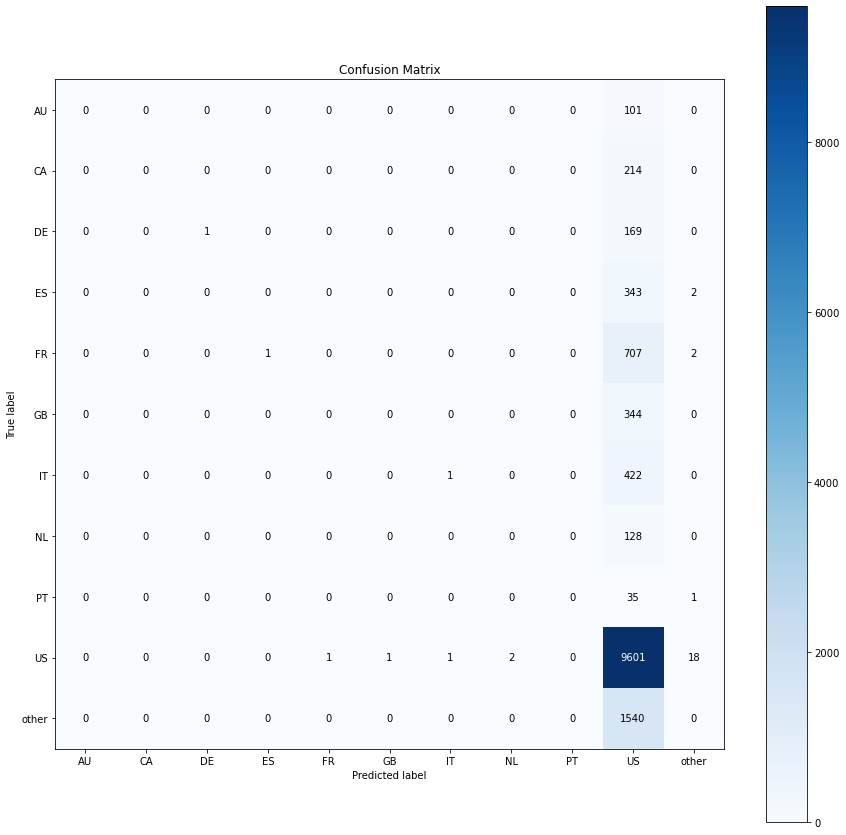

In [64]:
# accuracy
acc_nn = m.accuracy_score(y_test_nn, yhat_nn)
print('Accuracy: {}'.format(acc_nn))

# confusion matrix
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(15, 15));

# balanced accuracy

# F-scre balanced

# recall-precision

# ROC

# kappa metrics

# matthew metrics
